### NASDAQ ITCH5.0 Parser

#### 1. Load package and create an ITCH_trade object with NASDAQ_ITCH5.0 data (Please refer to ITCH_parser.py for details)

In [1]:
from ITCH_parser import ITCH_trade
ITCH_0130 = ITCH_trade('01302019.NASDAQ_ITCH50.gz')

#### 2. Extract non-cross trade information and cross trade information from NASDAQ_ITCH5.0 data using "get_trade_data( )" method
- Non-cross trade data is extracted from NASDAQ_ITCH5.0 message type "P" 
- Cross trade data is extracted from NASDAQ_ITCH5.0 message type "Q" 
- Non-cross trade data and cross trade data are saved in two separate dataframes
- Include trades executed during pre-market trading hours, normal trading hours, and after-hours trading (4 am to 8 pm)
- Column descriptions:
    - time: The time at which the trade is executed
    - end_time_hour: The end hour of the one-hour period in which the trade is executed (e.g., if a trade is executed at 15:35:17, then the trade is executed during the one-hour period of 3 pm to 4 pm, and the end_time_hour of this trade is 16
    - type: 
        - For non-cross trades: B (buy) or S (sell)
        - For cross trades: O (Nasdaq Opening Cross), C (Nasdaq Closing Cross), or H (Cross for IPO and halted/paused securities)
    - shares: The number of shares traded
    - stock: The stock code of the stock traded 
    - price: The price at which the stock is traded
- Sample code and output

In [2]:
non_cross_trade_df, cross_trade_df = ITCH_0130.get_trade_data()

In [3]:
# Information of non-cross trades (Sample) - Please find the full result in 'non_cross_trade.csv'
non_cross_trade_df.head(5)

,time,end_time_hour,type,shares,stock,price
0,4:00:00,5,B,1,UGAZ,39.16
1,4:00:04,5,B,200,SPY,264.40
2,4:00:47,5,B,16,AMZN,1613.71
3,4:00:47,5,B,55,SPY,264.15
4,4:00:55,5,B,40,AAPL,162.72


In [4]:
# Information of cross trades (Sample) - Please find the full result in 'cross_trade.csv'
cross_trade_df[10:15]

,time,end_time_hour,type,shares,stock,price
10,9:30:00,10,O,44,SPCB,1.75
11,9:30:00,10,O,289,ECOL,62.40
12,9:30:00,10,O,0,IOR,0.00
13,9:30:00,10,O,1563,USIG,53.74
14,9:30:00,10,O,0,OMAD+,0.00


#### 3. Calculate VWAP for each trading hour for each stock using "get_VWAP_df(include_cross_trade)" method
- Produce a dataframe with hourly VWAP and VWAP for that trading day until the end of each trading hour for each stock
- Parameter "include_cross_trade" is defaulted to be "False". If false, cross trades data won't be included in the calculation of VWAP, otherwise, cross trades data will be included in the calculation of VWAP
- NOTE: It is not necessary to call "get_trade_data( )" method before calling "get_VWAP_df(include_cross_trade)" method. If "get_trade_data( )" method has been called, "get_VWAP_df(include_cross_trade)" method will use the non_cross_trade_df and cross_trade_df which have been generated. If "get_trade_data( )" method hasn't been called, "get_VWAP_df(include_cross_trade)" method will process raw NASDAQ_ITCH5.0 data from scratch
- Column descriptions:
    - end_time_hour: The end time (in hour) of each one-hour period (e.g., 5 means 5 am, 17 means 5 pm) 
    - stock: The code of the stock 
    - total_value: Total dollar value (shares * price) traded during the one-hour period before the end_time_hour (e.g., if end_time_hour = 11, total_value is the total dollar value traded from 10 am to 11 am) 
    - shares: Total number of shares traded during the one-hour period before the end_time_hour
    - vwap: VWAP of the one-hour period before the end_time_hour
    - cum_total_value: Total dollar value (shares * price) traded during the trading day before the end_time_hour (e.g., if end_time_hour = 11, cum_total_value is the total dollar value traded before 11 am on that trading day) 
    - cum_shares: Total shares traded during the trading day before the end_time_hour
    - cum_vwap: VWAP of the whole trading period before the end_time_hour in that trading day    
- Sample code and output

In [5]:
VWAP_include_cross_trade = ITCH_0130.get_VWAP_df(include_cross_trade = True)

In [6]:
# Information of VWAP calculated including cross trades (Sample) - Please find the full result in 'VWAP_include_cross_trade.csv'
VWAP_include_cross_trade.head()

,end_time_hour,stock,total_value,shares,vwap,cum_total_value,cum_shares,cum_vwap
0,5,AAPL,255638.71,1572,162.620,255638.71,1572,162.620
1,5,AMD,110315.40,5298,20.822,110315.40,5298,20.822
2,5,AMZN,90468.10,56,1615.502,90468.10,56,1615.502
3,5,BABA,864027.28,5404,159.887,864027.28,5404,159.887
4,5,FB,7550.92,52,145.210,7550.92,52,145.210


In [7]:
VWAP_without_cross_trade = ITCH_0130.get_VWAP_df(include_cross_trade = False)

In [8]:
# Information of VWAP calculated without cross trades (Sample) - Please find the full result in 'VWAP_without_cross_trade.csv'
VWAP_without_cross_trade.head()

,end_time_hour,stock,total_value,shares,vwap,cum_total_value,cum_shares,cum_vwap
0,5,AAPL,255638.71,1572,162.620,255638.71,1572,162.620
1,5,AMD,110315.40,5298,20.822,110315.40,5298,20.822
2,5,AMZN,90468.10,56,1615.502,90468.10,56,1615.502
3,5,BABA,864027.28,5404,159.887,864027.28,5404,159.887
4,5,FB,7550.92,52,145.210,7550.92,52,145.210


#### 4. Take 'AMZN' as an example

In [9]:
# VWAP information of AMZN (calculated with cross trades and non-cross trades)
AMZN_include_cross_trade = VWAP_include_cross_trade[VWAP_include_cross_trade['stock'] == 'AMZN']
AMZN_include_cross_trade

,end_time_hour,stock,total_value,shares,vwap,cum_total_value,cum_shares,cum_vwap
2,5,AMZN,9.046810e+04,56,1615.502,9.046810e+04,56,1615.502
24,6,AMZN,6.811623e+05,421,1617.963,7.716304e+05,477,1617.674
56,7,AMZN,8.302168e+05,513,1618.356,1.601847e+06,990,1618.028
97,8,AMZN,4.423696e+06,2729,1620.995,6.025543e+06,3719,1620.205
220,9,AMZN,2.755634e+06,1701,1620.008,8.781177e+06,5420,1620.143
810,10,AMZN,2.071280e+08,127012,1630.775,2.159092e+08,132432,1630.340
9389,11,AMZN,1.600630e+08,97702,1638.277,3.759722e+08,230134,1633.710
14148,12,AMZN,8.679745e+07,52779,1644.545,4.627696e+08,282913,1635.731
18800,13,AMZN,8.737474e+07,52892,1651.946,5.501443e+08,335805,1638.285
23342,14,AMZN,7.186875e+07,43506,1651.927,6.220131e+08,379311,1639.850


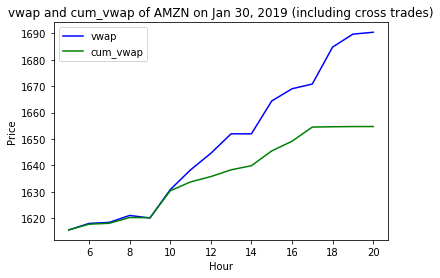

In [12]:
# Show vwap and cum_vwap in a graph
import matplotlib.pyplot as plt
plt.plot(AMZN_include_cross_trade['end_time_hour'], AMZN_include_cross_trade['vwap'], 'b-')
plt.plot(AMZN_include_cross_trade['end_time_hour'], AMZN_include_cross_trade['cum_vwap'], 'g-')
plt.legend(('vwap', 'cum_vwap'))
plt.title('vwap and cum_vwap of AMZN on Jan 30, 2019 (including cross trades)')
plt.xlabel('Hour')
plt.ylabel('Price')
plt.show()

In [13]:
# VWAP information of AMZN (calculated without cross trades)
AMZN_without_cross_trade = VWAP_without_cross_trade[VWAP_without_cross_trade['stock'] == 'AMZN']
AMZN_without_cross_trade

,end_time_hour,stock,total_value,shares,vwap,cum_total_value,cum_shares,cum_vwap
2,5,AMZN,9.046810e+04,56,1615.502,9.046810e+04,56,1615.502
24,6,AMZN,6.811623e+05,421,1617.963,7.716304e+05,477,1617.674
56,7,AMZN,8.302168e+05,513,1618.356,1.601847e+06,990,1618.028
97,8,AMZN,4.423696e+06,2729,1620.995,6.025543e+06,3719,1620.205
220,9,AMZN,2.755634e+06,1701,1620.008,8.781177e+06,5420,1620.143
639,10,AMZN,1.382219e+08,84556,1634.679,1.470031e+08,89976,1633.803
4919,11,AMZN,1.600630e+08,97702,1638.277,3.070661e+08,187678,1636.132
9678,12,AMZN,8.679745e+07,52779,1644.545,3.938635e+08,240457,1637.979
14330,13,AMZN,8.737474e+07,52892,1651.946,4.812383e+08,293349,1640.497
18871,14,AMZN,7.186875e+07,43506,1651.927,5.531070e+08,336855,1641.974


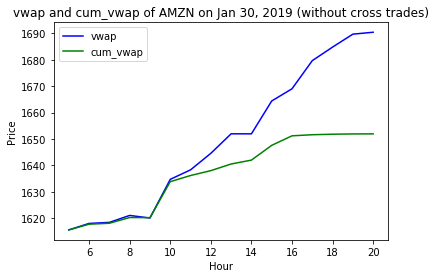

In [14]:
# Show vwap and cum_vwap in a graph
plt.plot(AMZN_without_cross_trade['end_time_hour'], AMZN_without_cross_trade['vwap'], 'b-')
plt.plot(AMZN_without_cross_trade['end_time_hour'], AMZN_without_cross_trade['cum_vwap'], 'g-')
plt.legend(('vwap', 'cum_vwap'))
plt.title('vwap and cum_vwap of AMZN on Jan 30, 2019 (without cross trades)')
plt.xlabel('Hour')
plt.ylabel('Price')
plt.show()